In [1]:
import cPickle as pickle
import h5py

def PlotMixtures():
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(0, 11)]
    LL, LL_no_dm = np.zeros((11,11)), np.zeros((11,11))
    for i, model in enumerate(models):
        h = h5py.File('../mod_c/'+model)

        peb_frac = ['/fit_results/galprop_frac_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac])
        
        peb_frac_no_dm = ['/fit_results/galprop_frac_no_dm_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL_no_dm[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac_no_dm])
    
    
    plt.figure(figsize=(12,2.25))
    
    plt.subplot(131)
    plt.imshow(2*(LL-np.min(LL)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=2500, extent=[-.05,1.05,0.05,1.05])
    plt.plot()
    plt.colorbar(label=r'$2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm sprl}$')
    plt.xlabel(r'$f_{\rm Gal\ Gas}$')
    plt.text(0,.95,'With DM',fontsize=10)
    
    plt.subplot(132)
    plt.imshow(2*(LL_no_dm-np.min(LL_no_dm)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=2500, extent=[-.05,1.05,0.05,1.05])
    plt.plot()
    plt.colorbar(label=r'$2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm sprl}$')
    plt.xlabel(r'$f_{\rm Gal\ Gas}$')
    plt.text(0,.95,'No DM',fontsize=10)
    
    plt.subplot(133)
    plt.imshow(-2*(LL-LL_no_dm), origin='lower', cmap='rainbow', interpolation='nearest', extent=[-.05,1.05,0.05,1.05])
    plt.plot()
    plt.colorbar(label=r'$-2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm sprl}$')
    plt.xlabel(r'$f_{\rm Gal\ Gas}$')
    plt.text(0,.95,'TS of DM',fontsize=10)
    plt.show()
    
    
            
    
#     plt.yscale('log')
#     plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
#     plt.xlabel(r'$\rm{E\ [GeV]}$')
    

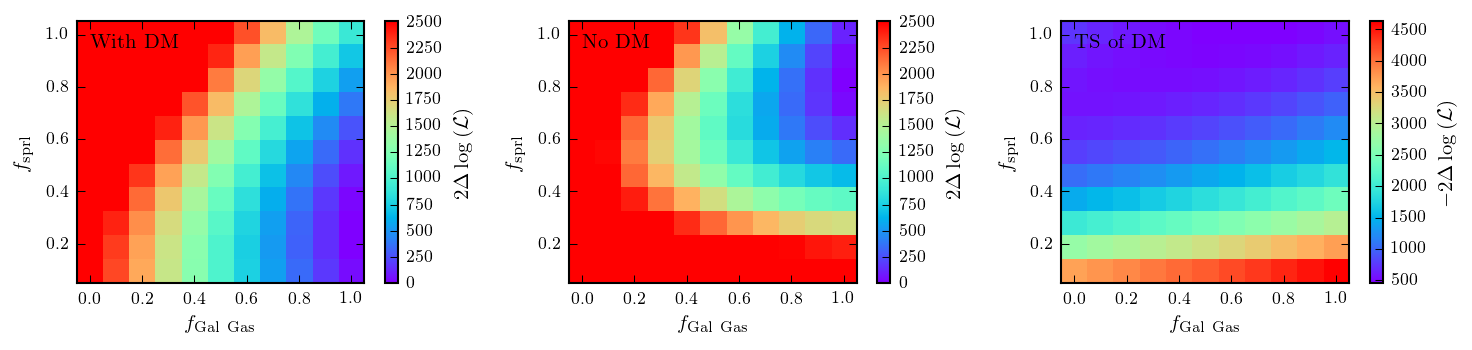

In [2]:
PlotMixtures()